# 04_Geometry — Camera Geometry & Calibration
**Nama:** Versa Syahputra  
**NIM:** 23525041

## 🎯 Tujuan
Camera Geometry & Calibration bertujuan untuk mengetahui dan mengoreksi bagaimana kamera “melihat” dunia agar kita bisa memahami posisi, bentuk, dan proyeksi objek di dalam gambar.

## 🧠 Teori Singkat

### Camera Geometry
Geometry pada citra berhubungan dengan transformasi geometris pada citra, <br>
yaitu bagaimana koordinat piksel dapat diubah melalui operasi seperti translasi, rotasi, scaling, dan homografi.

### Camera Calibration
Camera calibration adalah bagaimana menemukan parameter yang menjelaskan bagaimana kamera memproyeksikan titik di dunia nyata (3D) ke bidang gambar (2D).

Parameter kamera:
- `Intrinsik`: karakteristik internal kamera (focal length, principal point, distortion)
- `Ekstrinsik`: posisi dan orientasi kamera terhadap dunia nyata




## Implementasi Camera Geometry & Calibration

### Fungsi pendukung dan import module

In [11]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import cv2

def show_images(images: list[np.ndarray], titles: list[str], suptitle: str) -> None:
    """
    Menampilkan beberapa gambar dengan judul yang sesuai dalam satu figure.

    Args:
        images (list[np.ndarray]): List gambar yang akan ditampilkan.
        titles (list[str]): List judul untuk setiap gambar.
        suptitle (str): Judul utama untuk seluruh figure.
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    for i in range(n):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    fig.suptitle(suptitle)
    plt.show()


### Dataset citra
Menggunakan 2 jenis gambar untuk eksplorasi Camera Geometry & Calibration
- `checkerboard` dari `skimage.data`
- Gambar eksternal oleh Clark Van Der Beken from Pexels: https://www.pexels.com/photo/teal-and-white-striped-illustration-12981881/

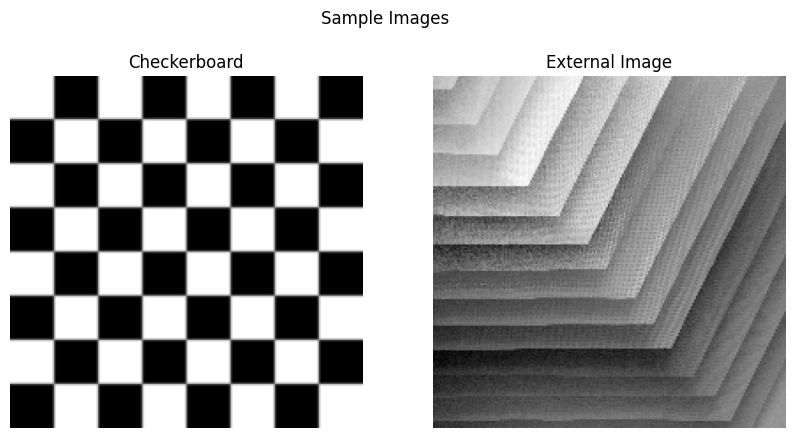

In [31]:
img_check = data.checkerboard()

# Gambar external
img_ext = cv2.imread("../pexels-snapsbyclark-12981881.jpg", cv2.IMREAD_GRAYSCALE)

# reduksi ukuran gambar eksternal agar sesuai
img_ext = cv2.resize(img_ext, (200, 200))

show_images(
    [img_check, img_ext],
    ["Checkerboard", "External Image"],
    "Sample Images"
)

### Implementasi Transformasi Geometris — Homography (Perspective Transform)

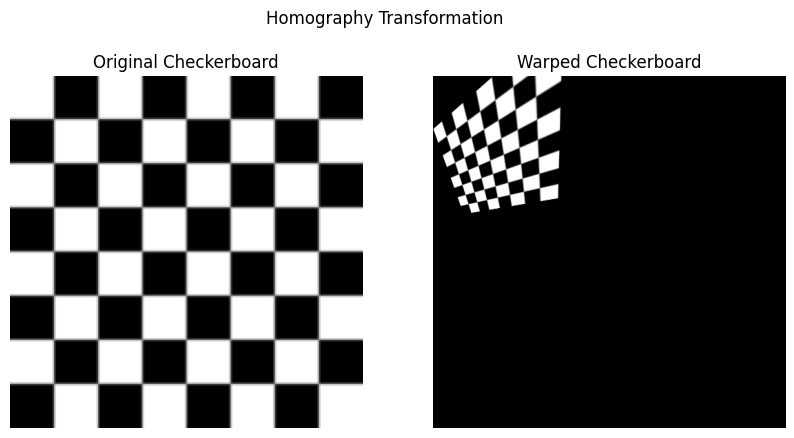

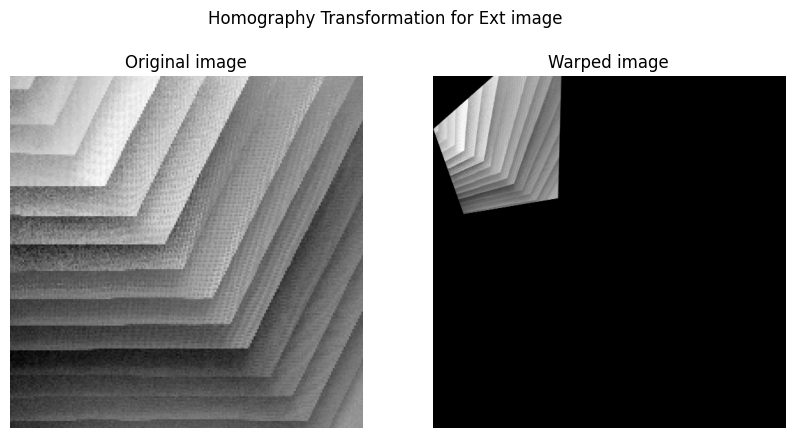

In [32]:
# Titik sumber (koordinat 4 titik di gambar checkerboard)
pts_src = np.array([[50, 50], [150, 50], [150, 150], [50, 150]], dtype=np.float32)

# Titik tujuan (ubah sedikit untuk mensimulasikan efek perspektif)
pts_dst = np.array([[40, 100], [120, 50], [130, 150], [60, 170]], dtype=np.float32)

# Hitung matriks homografi
H, _ = cv2.findHomography(pts_src, pts_dst)

# Terapkan transformasi
img_warped = cv2.warpPerspective(img_check, H, (512, 512))

show_images(
    [img_check, img_warped],
    ["Original Checkerboard", "Warped Checkerboard"],
    "Homography Transformation"
)

ext_warped = cv2.warpPerspective(img_ext, H, (512, 512)).astype(np.uint8)

show_images(
    [img_ext, ext_warped],
    ["Original image", "Warped image"],
    "Homography Transformation for Ext image"
)

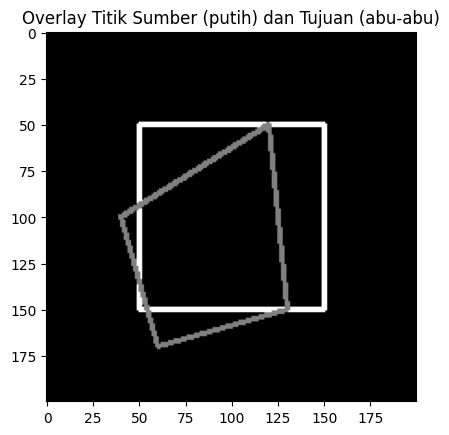

In [33]:
# Buat overlay untuk menunjukkan efek transformasi
overlay = np.zeros_like(img_check, dtype=np.uint8)
cv2.polylines(overlay, [np.int32(pts_src)], isClosed=True, color=255, thickness=2)
cv2.polylines(overlay, [np.int32(pts_dst)], isClosed=True, color=128, thickness=2)

fig, ax = plt.subplots()
ax.imshow(overlay, cmap='gray')
ax.set_title("Overlay Titik Sumber (putih) dan Tujuan (abu-abu)")
plt.show()


## ✅ Kesimpulan & Analisis

Berdasarkan hasil implementasi, diperoleh bahwa transformasi geometris seperti homografi (perspective transform) mampu memetakan satu bidang citra ke bidang lain dengan perubahan posisi, orientasi, dan sudut pandang yang signifikan. Pada eksperimen ini, citra checkerboard digunakan sebagai objek karena memiliki pola teratur yang memudahkan penentuan titik-titik korespondensi antara bidang sumber dan bidang tujuan.

Visualisasi overlay titik sumber (putih) dan titik tujuan (abu-abu) memperlihatkan bahwa bidang hasil transformasi mengalami perubahan bentuk dari persegi menjadi trapesium yang miring. Hal ini menunjukkan bahwa transformasi yang diterapkan bukan sekadar translasi atau rotasi biasa, melainkan transformasi perspektif yang mensimulasikan perubahan posisi kamera relatif terhadap bidang gambar. Dengan kata lain, homografi berhasil meniru efek pandangan kamera yang berpindah ke arah tertentu di ruang tiga dimensi.

Selain itu, visualisasi overlay juga memberikan insight penting tentang urutan dan posisi titik korespondensi. Ketidaksesuaian urutan titik dapat menghasilkan bidang yang tampak menyilang atau terdistorsi, sehingga overlay ini berfungsi sebagai alat validasi visual sebelum transformasi diterapkan. Eksperimen ini membuktikan bahwa geometri citra sangat sensitif terhadap pemilihan koordinat titik, dan kesalahan kecil dapat menyebabkan perubahan besar pada hasil transformasi.

Secara keseluruhan, bagian ini memperlihatkan bahwa geometri kamera berperan penting dalam memahami hubungan spasial antar citra. Meskipun kalibrasi kamera penuh tidak dilakukan, eksperimen sederhana dengan homografi sudah cukup menggambarkan konsep dasar bagaimana bidang gambar dapat diproyeksikan ke sudut pandang berbeda — konsep yang menjadi fondasi dari berbagai aplikasi computer vision seperti camera calibration, augmented reality, dan 3D reconstruction.